In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [71]:
X = iris.data[:,2:]
y = iris.target
print(X[y==0, 0])
print(y[:20])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


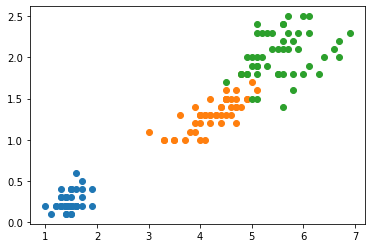

In [72]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [74]:
def plot_decision_boundary(model, axis):
    # 
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)))
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, cmap = custom_cmap)

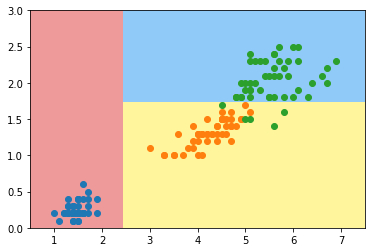

In [75]:
plot_decision_boundary(dt_clf, axis = [0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

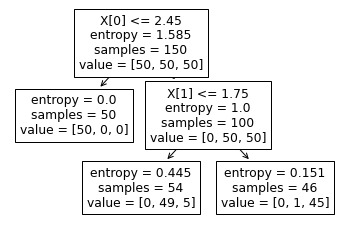

In [76]:
from sklearn import tree
tree.plot_tree(dt_clf)

## Exercise 01
DecisionTreeClassifier parameters

1. criterion: gini或者entropy,前者是基尼系数，后者是信息熵

2. splitter: best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中，默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"

3. max_features：None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

4. max_depth: int or None, optional (default=None) 设置决策随机森林中的决策树的最大深度，深度越大，越容易过拟合，推荐树的深度为：5-20之间

5. min_samples_split：设置结点的最小样本数量，当样本数量可能小于此值时，结点将不会在划分

6. min_samples_leaf: 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝

7. min_weight_fraction_leaf: 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题

8. max_leaf_nodes: 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数

9. class_weight: 指定样本各类别的的权重，主要是为了防止训练集某些类别的
样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高

10. min_impurity_split: 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点

**因为**

偏差：描述样本拟合出的模型的预测结果的期望与样本真实结果的差距，要想偏差表现的好，就需要复杂化模型，增加模型的参数，但这样容易过拟合，点会很分散。低偏差对应的点都打在靶心附近，所以喵的很准，但不一定很稳；
方差：描述样本上训练出来的模型在测试集上的表现，要想方差表现的好，需要简化模型，减少模型的复杂度，但这样容易欠拟合，点偏离中心。低方差对应就是点都打的很集中，但不一定是靶心附近，手很稳，但不一定瞄的准。

**所以**

max_features，max_depth，max_leaf_nodes增加会增大模型的复杂度，那么就会降低偏差，但可能会过拟合，同时也会增大方差
min_samples_split，min_samples_leaf，min_weight_fraction_leaf可以限制模型复杂度，那么就会减小方差，但这样容易欠拟合

In [77]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

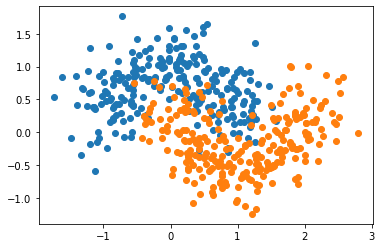

In [78]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [79]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=300,max_samples=300,bootstrap=True,oob_score=True)

bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

In [80]:
bagging_clf.oob_score_

0.916

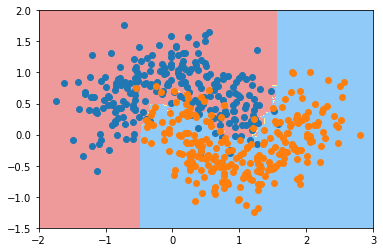

In [81]:
plot_decision_boundary(bagging_clf, axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [85]:
# Use Random Forest directly
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300,random_state=666,oob_score=True)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

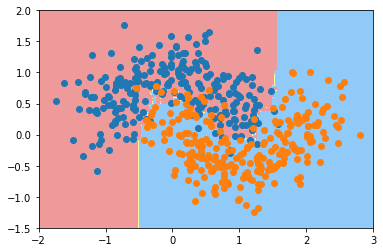

In [86]:
plot_decision_boundary(rf_clf, axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Exercise 02:
1. base_estimator : object, default=None 对数据集的随机子集进行拟合的基本估计器。 如果没有，则基本估计器是决策树

2. n_estimators : int, default=10 集合中的基本估计器的数量

2. max_samples : int or float, default=1.0 从X中提取的样本数，用于训练每个基本估计器

3. max_features : 从X中提取的用于训练每个基本估计器的特征数

4. bootstrap : bool, default=True 是否抽取样本进行替换。 如果为False，则执行不替换的采样

5. bootstrap_features : bool, default=False 是否使用替换绘制特征

6. oob_score : bool, default=False 是否使用集合外的样本来估计泛化误差

7. warm_start : bool, default=False 重复使用前面调用的解决方案来拟合并向集成中添加更多的估计器，否则，只需拟合一个全新的集成

8. n_jobs : int, default=None 为fit和predict并行运行的作业数

9. random_state : int or RandomState, default=None 控制原始数据集的随机重采样（采样和特征）

10. verbose : int, default=0 控制拟合和预测时的详细程度

**因为**

偏差：描述样本拟合出的模型的预测结果的期望与样本真实结果的差距，要想偏差表现的好，就需要复杂化模型，增加模型的参数，但这样容易过拟合，点会很分散。低偏差对应的点都打在靶心附近，所以喵的很准，但不一定很稳；
方差：描述样本上训练出来的模型在测试集上的表现，要想方差表现的好，需要简化模型，减少模型的复杂度，但这样容易欠拟合，点偏离中心。低方差对应就是点都打的很集中，但不一定是靶心附近，手很稳，但不一定瞄的准。

**所以**

max_samples，max_features，verbose增加会增大模型的复杂度，那么就会降低偏差，但可能会过拟合，同时也会增大方差
反之减小则可以限制模型复杂度，那么就会减小方差，但这样容易欠拟合